In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Specifikuj cestu k souboru CSV
FILENAME = 'baseline_verification_results.csv'

# Načtení CSV souboru do DataFrame
data = pd.read_csv(FILENAME)
data

,source_speaker,target_speaker,ref_file,gen_file,score
0,p225,p226,../baseline_data/source/p225-test/19.wav,../baseline_data/converted/p225/1.wav,0.53
1,p225,p226,../baseline_data/source/p225-test/19.wav,../baseline_data/converted/p225/10.wav,0.95
2,p225,p226,../baseline_data/source/p225-test/19.wav,../baseline_data/converted/p225/11.wav,0.53
3,p225,p226,../baseline_data/source/p225-test/19.wav,../baseline_data/converted/p225/12.wav,0.95
4,p225,p226,../baseline_data/source/p225-test/19.wav,../baseline_data/converted/p225/13.wav,0.73
...,...,...,...,...,...
115,p256,p254,../baseline_data/source/p256-test/108.wav,../baseline_data/converted/p256/103.wav,0.90
116,p256,p254,../baseline_data/source/p256-test/108.wav,../baseline_data/converted/p256/104.wav,0.53
117,p256,p254,../baseline_data/source/p256-test/108.wav,../baseline_data/converted/p256/105.wav,0.09
118,p256,p254,../baseline_data/source/p256-test/108.wav,../baseline_data/converted/p256/106.wav,0.71


In [10]:
result_summary = data.groupby(['source_speaker', 'target_speaker']).agg({'score': ['mean', 'std', 'max']})
result_summary.columns = ['mean_score', 'std_deviation', 'max_score']
result_summary = result_summary.sort_values(by='mean_score', ascending=False)

result_summary

,,mean_score,std_deviation,max_score
source_speaker,target_speaker,,,
p225,p226,0.657,0.221211,0.97
p254,p256,0.584,0.342416,0.96
p233,p231,0.575,0.245595,0.86
p227,p228,0.561,0.281916,0.93
p232,p243,0.557,0.238003,0.91
p229,p230,0.512,0.286038,0.97
p230,p229,0.496,0.295116,0.93
p228,p227,0.476,0.258766,0.74
p243,p232,0.458,0.290968,0.94


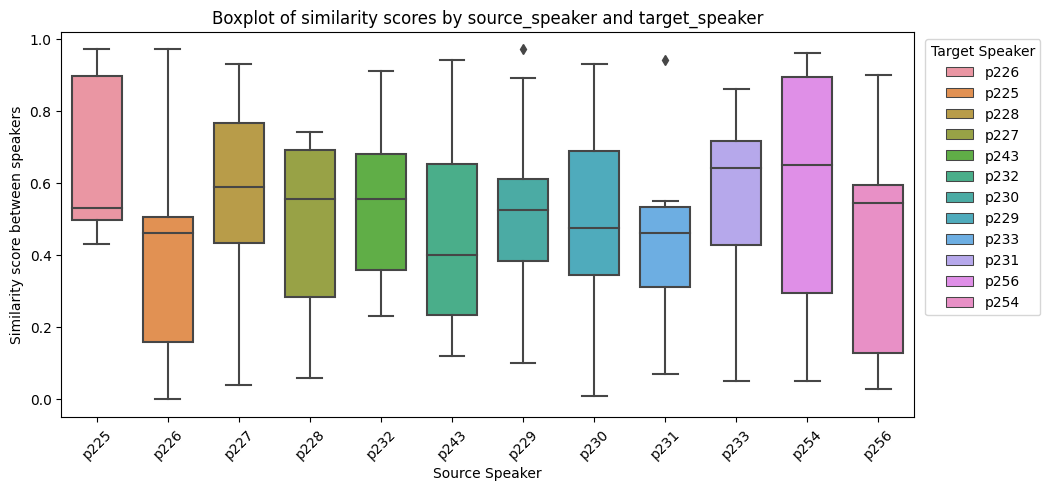

In [12]:
# Vytvoření boxplotu pro skóre podle kombinace source_speaker a target_speaker
plt.figure(figsize=(11, 5))
sns.boxplot(x='source_speaker', y='score', hue='target_speaker', data=data, width=0.7, dodge=False)
plt.title('Boxplot of similarity scores by source_speaker and target_speaker')
plt.xlabel('Source Speaker')
plt.ylabel('Similarity score between speakers')
plt.xticks(rotation=45)
plt.legend(title='Target Speaker', bbox_to_anchor=(1.005, 1), loc='upper left')
plt.show()